### Multi-Class Model Selection using ROC and Precision-Recall Curves

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

#### Scaling test and train data

In [36]:
train_data = np.loadtxt('statlog_landsat_satellite/sat.trn', delimiter=' ')
test_data = np.loadtxt('statlog_landsat_satellite/sat.tst', delimiter=' ')


X_train = train_data[:,:-1]
y_train = train_data[:, -1]

X_test = test_data[:,:-1]
y_test = test_data[:, -1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to test data
X_test_scaled = scaler.transform(X_test)


### Dummy Classifier (Prior)

In [37]:
# prior dummy classifier model
dummy = DummyClassifier(strategy="prior", random_state=0)
dummy.fit(X_train_scaled, y_train)
y_pred = dummy.predict(X_test_scaled)
y_pred_proba_dummy = dummy.predict_proba(X_test_scaled)

# Overall Accuracy
accuracy_dummy = accuracy_score(y_test, y_pred)

# Weighted F1-Score
weighted_f1_dummy = f1_score(y_test, y_pred, average='weighted', zero_division=0)
dummy_classification_report = classification_report(y_test, y_pred, zero_division=0)

print("Overall Accuracy:", accuracy_dummy)
print("Weighted F1-Score:", round(weighted_f1_dummy,4))
print(dummy_classification_report)

macro_roc_auc_ovr_dummy = roc_auc_score(
    y_test,
    y_pred_proba_dummy,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_dummy:.2f}")

Overall Accuracy: 0.2305
Weighted F1-Score: 0.0864
              precision    recall  f1-score   support

         1.0       0.23      1.00      0.37       461
         2.0       0.00      0.00      0.00       224
         3.0       0.00      0.00      0.00       397
         4.0       0.00      0.00      0.00       211
         5.0       0.00      0.00      0.00       237
         7.0       0.00      0.00      0.00       470

    accuracy                           0.23      2000
   macro avg       0.04      0.17      0.06      2000
weighted avg       0.05      0.23      0.09      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.50


### Logistic Regression

In [38]:
# multiclass logistic regression model
model = LogisticRegression( 
    solver='lbfgs',            
    max_iter=1000 ,             
)

model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba_logistic = model.predict_proba(X_test_scaled)

# Overall Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred)

# Weighted F1-Score
weighted_f1_logistic = f1_score(y_test, y_pred, average='weighted')
logistic_classification_report = classification_report(y_test, y_pred)

print("Overall Accuracy:", accuracy_logistic)
print("Weighted F1-Score:", round(weighted_f1_logistic,4))
print(logistic_classification_report)

macro_roc_auc_ovr_logistic = roc_auc_score(
    y_test,
    y_pred_proba_logistic,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_logistic:.2f}")

Overall Accuracy: 0.8395
Weighted F1-Score: 0.8296
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       461
         2.0       0.95      0.93      0.94       224
         3.0       0.86      0.93      0.89       397
         4.0       0.51      0.30      0.38       211
         5.0       0.84      0.76      0.80       237
         7.0       0.75      0.86      0.80       470

    accuracy                           0.84      2000
   macro avg       0.81      0.79      0.80      2000
weighted avg       0.83      0.84      0.83      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.98


### K Nearest Neighbours

In [39]:
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights='distance',
    n_jobs= -1
)

model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba_knn = model.predict_proba(X_test_scaled)
# Overall Accuracy
accuracy_knn = accuracy_score(y_test, y_pred)

# Weighted F1-Score
weighted_f1_knn = f1_score(y_test, y_pred, average='weighted')
knn_classification_report = classification_report(y_test, y_pred)

print("Overall Accuracy:", accuracy_knn)
print("Weighted F1-Score:", round(weighted_f1_knn,4))
print(knn_classification_report)

macro_roc_auc_ovr_knn = roc_auc_score(
    y_test,
    y_pred_proba_knn,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_knn:.2f}")

Overall Accuracy: 0.9065
Weighted F1-Score: 0.9056
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       461
         2.0       0.98      0.97      0.97       224
         3.0       0.90      0.93      0.91       397
         4.0       0.74      0.69      0.71       211
         5.0       0.92      0.87      0.90       237
         7.0       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.98


### Decision Trees

In [40]:
model = DecisionTreeClassifier(
    criterion= 'entropy',
    max_depth= 15,
    class_weight='balanced'
)

model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba_dtree = model.predict_proba(X_test_scaled)

# Overall Accuracy
accuracy_dtree = accuracy_score(y_test, y_pred)

# Weighted F1-Score
weighted_f1_dtree = f1_score(y_test, y_pred, average='weighted')
dtree_classification_report = classification_report(y_test, y_pred)

print("Overall Accuracy:", accuracy_dtree)
print("Weighted F1-Score:", round(weighted_f1_dtree,4))
print(dtree_classification_report)

macro_roc_auc_ovr_dtree = roc_auc_score(
    y_test,
    y_pred_proba_dtree,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_dtree:.2f}")

Overall Accuracy: 0.8395
Weighted F1-Score: 0.8412
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       461
         2.0       0.93      0.95      0.94       224
         3.0       0.87      0.82      0.84       397
         4.0       0.54      0.61      0.57       211
         5.0       0.84      0.79      0.82       237
         7.0       0.82      0.82      0.82       470

    accuracy                           0.84      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.84      0.84      0.84      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.90


### Naive Bayes

In [41]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba_nb = model.predict_proba(X_test_scaled)


# Overall Accuracy
accuracy_nb = accuracy_score(y_test, y_pred)

# Weighted F1-Score
weighted_f1_nb = f1_score(y_test, y_pred, average='weighted')

# Classification Report
nb_classification_report = classification_report(y_test, y_pred)

print("Naïve Bayes Results")
print("----------------------")
print("Overall Accuracy:", accuracy_nb)
print("Weighted F1-Score:", round(weighted_f1_nb, 4))
print(nb_classification_report)

# Macro-averaged ROC AUC (One-vs-Rest)
macro_roc_auc_ovr_nb = roc_auc_score(
    y_test,
    y_pred_proba_nb,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_nb:.2f}")

Naïve Bayes Results
----------------------
Overall Accuracy: 0.7965
Weighted F1-Score: 0.8036
              precision    recall  f1-score   support

         1.0       0.89      0.84      0.86       461
         2.0       0.98      0.89      0.93       224
         3.0       0.91      0.88      0.89       397
         4.0       0.49      0.67      0.57       211
         5.0       0.61      0.70      0.65       237
         7.0       0.84      0.75      0.79       470

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.78      2000
weighted avg       0.82      0.80      0.80      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.96


### Support Vector Machine

In [42]:

model = SVC(
    kernel='rbf',     
    probability=True,    
    class_weight='balanced',
    C=1.0,
    random_state=42
)

model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba_svm = model.predict_proba(X_test_scaled)

# Overall Accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

# Weighted F1-Score
weighted_f1_svm = f1_score(y_test, y_pred, average='weighted')

# Classification Report
svm_classification_report = classification_report(y_test, y_pred)

print(" SVM Results")
print("--------------")
print("Overall Accuracy:", accuracy_svm)
print("Weighted F1-Score:", round(weighted_f1_svm, 4))
print(svm_classification_report)

# Macro-averaged ROC AUC (One-vs-Rest)
macro_roc_auc_ovr_svm = roc_auc_score(
    y_test,
    y_pred_proba_svm,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_svm:.2f}")


 SVM Results
--------------
Overall Accuracy: 0.884
Weighted F1-Score: 0.8875
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       461
         2.0       0.96      0.97      0.97       224
         3.0       0.91      0.90      0.90       397
         4.0       0.56      0.77      0.65       211
         5.0       0.89      0.93      0.91       237
         7.0       0.92      0.76      0.83       470

    accuracy                           0.88      2000
   macro avg       0.87      0.89      0.88      2000
weighted avg       0.90      0.88      0.89      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.99


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
model = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=20,
    class_weight='balanced',
    random_state=42
)

# Train
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba_rf = model.predict_proba(X_test_scaled)

# Overall Accuracy
accuracy_rf = accuracy_score(y_test, y_pred)

# Weighted F1-Score
weighted_f1_rf = f1_score(y_test, y_pred, average='weighted')

# Classification Report
rf_classification_report = classification_report(y_test, y_pred)

print("Random Forest Results")
print("----------------------")
print("Overall Accuracy:", accuracy_rf)
print("Weighted F1-Score:", round(weighted_f1_rf, 4))
print(rf_classification_report)

# Macro-averaged ROC AUC (One-vs-Rest)
macro_roc_auc_ovr_rf = roc_auc_score(
    y_test,
    y_pred_proba_rf,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_rf:.2f}")


Random Forest Results
----------------------
Overall Accuracy: 0.9125
Weighted F1-Score: 0.9103
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       461
         2.0       0.97      0.97      0.97       224
         3.0       0.89      0.96      0.92       397
         4.0       0.78      0.64      0.70       211
         5.0       0.94      0.89      0.92       237
         7.0       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.99


### XGBoost

In [44]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


# Encode labels to 0-based integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Initialize XGBoost model
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)

# Train
model.fit(X_train_scaled, y_train_enc)

# Predict on the test set
y_pred_enc = model.predict(X_test_scaled)
y_pred_proba_xgb = model.predict_proba(X_test_scaled)

# Decode back to original labels
y_pred = le.inverse_transform(y_pred_enc)

# Overall Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred)
weighted_f1_xgb = f1_score(y_test, y_pred, average='weighted')

# Classification Report
xgb_classification_report = classification_report(y_test, y_pred)

print("XGBoost Results")
print("----------------------")
print("Overall Accuracy:", accuracy_xgb)
print("Weighted F1-Score:", round(weighted_f1_xgb, 4))
print(xgb_classification_report)

# Macro-averaged ROC AUC (One-vs-Rest)
macro_roc_auc_ovr_xgb = roc_auc_score(
    y_test_enc,
    y_pred_proba_xgb,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr_xgb:.2f}")


XGBoost Results
----------------------
Overall Accuracy: 0.911
Weighted F1-Score: 0.9092
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       461
         2.0       0.97      0.97      0.97       224
         3.0       0.89      0.94      0.91       397
         4.0       0.78      0.65      0.71       211
         5.0       0.93      0.89      0.91       237
         7.0       0.87      0.91      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000

Macro-averaged One-vs-Rest ROC AUC score:
0.99


### Broken KNN

- In this experiment, we intentionally invert the predicted probabilities from the KNN model (1 - p) and renormalize them so each row sums to 1.
- Then, we compute inverted class predictions by taking the argmax of these flipped probabilities and shifting the labels by 1 (mod number of classes) to ensure most predictions are wrong.
- This setup deliberately produces a “broken” KNN — where accuracy, weighted F1, and macro AUC are all low, simulating a model that ranks classes in the opposite direction of correctness.

In [45]:

model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba_knn = model.predict_proba(X_test_scaled)


# Invert probabilities intentionally


# For multi-class classification, you can reverse probabilities per class:
y_pred_proba_knn_inverted = 1 - y_pred_proba_knn
# and renormalize if needed (sum to 1):
y_pred_proba_knn_inverted = y_pred_proba_knn_inverted / y_pred_proba_knn_inverted.sum(axis=1, keepdims=True)

y_pred_inverted = np.argmax(y_pred_proba_knn_inverted, axis=1)

# Shift class labels by 1 (wrap around using modulo)
n_classes = y_pred_proba_knn_inverted.shape[1]
y_pred_inverted = (y_pred_inverted + 1) % n_classes

# Accuracy and F1 stay the same
accuracy_knn_broken = accuracy_score(y_test, y_pred_inverted)
weighted_f1_knn_broken = f1_score(y_test, y_pred_inverted, average='weighted', zero_division=0)
knn_broken_classification_report = classification_report(y_test, y_pred_inverted, zero_division=0)

print("Overall Accuracy:", accuracy_knn_broken)
print("Weighted F1-Score:", round(weighted_f1_knn_broken, 4))
print(knn_broken_classification_report)

# Compute AUC with inverted probabilities
macro_roc_auc_ovr_knn_broken = roc_auc_score(
    y_test,
    y_pred_proba_knn_inverted,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score (inverted):\n{macro_roc_auc_ovr_knn_broken:.2f}")


Overall Accuracy: 0.0
Weighted F1-Score: 0.0
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     461.0
         2.0       0.00      0.00      0.00     224.0
         3.0       0.00      0.00      0.00     397.0
         4.0       0.00      0.00      0.00     211.0
         5.0       0.00      0.00      0.00     237.0
         7.0       0.00      0.00      0.00     470.0

    accuracy                           0.00    2000.0
   macro avg       0.00      0.00      0.00    2000.0
weighted avg       0.00      0.00      0.00    2000.0

Macro-averaged One-vs-Rest ROC AUC score (inverted):
0.02


 Model Performance Summary
Dummy(Prior)    | Accuracy: 0.2305 | Weighted F1: 0.0864
Decision Tree   | Accuracy: 0.8395 | Weighted F1: 0.8412
KNN             | Accuracy: 0.9065 | Weighted F1: 0.9056
Naive Bayes     | Accuracy: 0.7965 | Weighted F1: 0.8036
SVM             | Accuracy: 0.8840 | Weighted F1: 0.8875
Logistic Reg    | Accuracy: 0.8395 | Weighted F1: 0.8296
Random Forest   | Accuracy: 0.9125 | Weighted F1: 0.9103
XGboost         | Accuracy: 0.9110 | Weighted F1: 0.9092
KNN Broken      | Accuracy: 0.0000 | Weighted F1: 0.0000


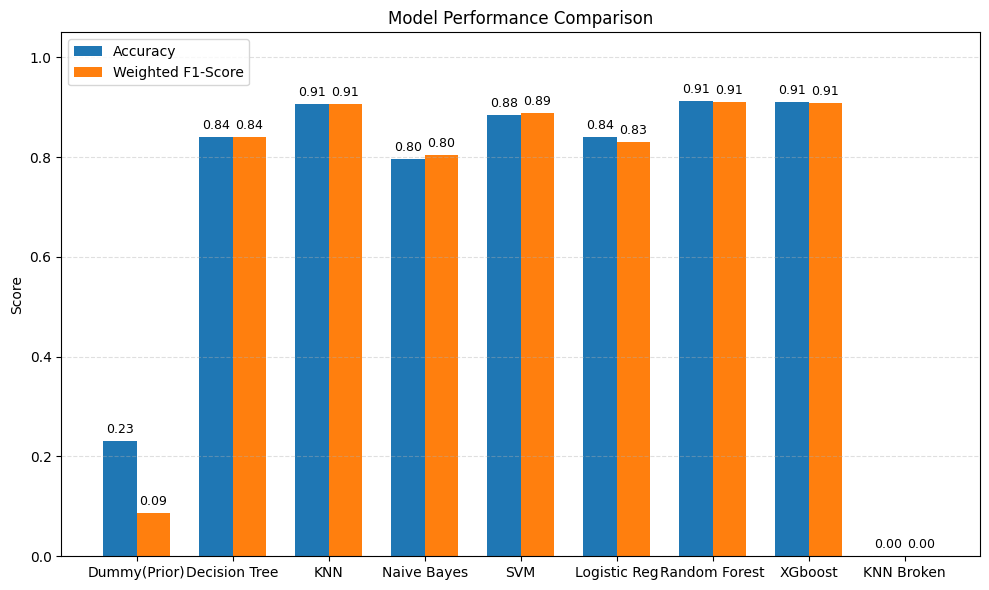

In [46]:

model_metrics = {
    "Dummy(Prior)": {
        "accuracy": accuracy_dummy,
        "f1": weighted_f1_dummy
    },
    "Decision Tree": {
        "accuracy": accuracy_dtree,
        "f1": weighted_f1_dtree
    },
    "KNN": {
        "accuracy": accuracy_knn,
        "f1": weighted_f1_knn
    },
    "Naive Bayes": {
        "accuracy": accuracy_nb,
        "f1": weighted_f1_nb
    },
    "SVM": {
        "accuracy": accuracy_svm,
        "f1": weighted_f1_svm
    },
    "Logistic Reg": {
        "accuracy": accuracy_logistic,
        "f1": weighted_f1_logistic
    },
    "Random Forest": {
        "accuracy": accuracy_rf,
        "f1": weighted_f1_rf
    },
    "XGboost": {
        "accuracy": accuracy_xgb,
        "f1": weighted_f1_xgb
    },
    "KNN Broken": {
        "accuracy": accuracy_knn_broken,
        "f1": weighted_f1_knn_broken
    },

}

print(" Model Performance Summary")
print("=" * 60)
for name, metrics in model_metrics.items():
    print(f"{name:15s} | Accuracy: {metrics['accuracy']:.4f} | Weighted F1: {metrics['f1']:.4f}")
print("=" * 60)

# --- Prepare data for plotting ---
models = list(model_metrics.keys())
accuracies = [m["accuracy"] for m in model_metrics.values()]
f1_scores = [m["f1"] for m in model_metrics.values()]

x = np.arange(len(models))
width = 0.35  # width of the bars

# --- Plot bar chart ---
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, accuracies, width, label='Accuracy')
bars2 = plt.bar(x + width/2, f1_scores, width, label='Weighted F1-Score')

# Add text labels on bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=9)

# --- Plot settings ---
plt.xticks(x, models, rotation=0)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### One-vs-Rest (OvR) ROC in Multi-Class Classification

In a multi-class setting (more than two classes), the **ROC curve** and **AUC** cannot be computed directly because these metrics are originally defined for binary classification.  
To handle this, the **One-vs-Rest (OvR)** approach is used.

#### How OvR Works
- For a problem with `K` classes, OvR creates **K binary classifiers**.
- Each classifier treats one class as the **positive class** and the rest as **negative**.
- For each class:
  - Compute the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** by thresholding the predicted probabilities.
  - Plot the ROC curve using `(FPR, TPR)` pairs.
  - The area under the ROC curve is the AUC.

#### Macro-Averaged AUC
- Compute the AUC for each class individually.
- Then take the **unweighted mean** of all class AUCs.

#### Why Use OvR?
- It provides insight into how well each class is separated from the rest.
- The macro-average gives an overall performance metric across all classes, regardless of imbalance.




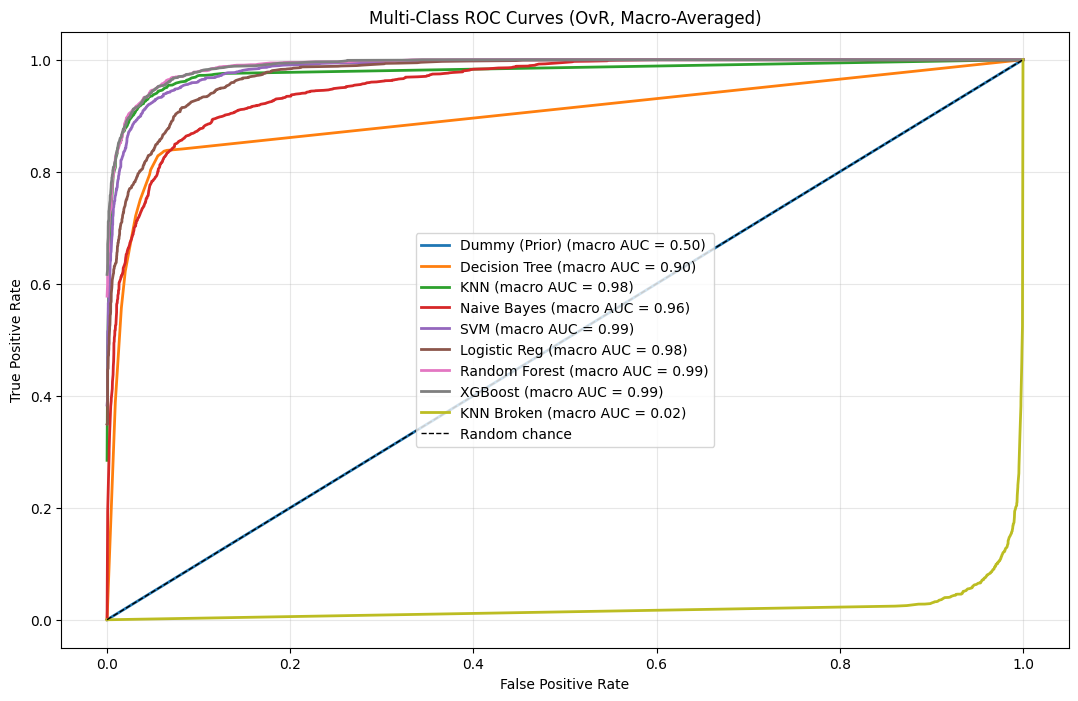

In [47]:
models = {
    "Dummy (Prior)": (y_test, y_pred_proba_dummy),
    "Decision Tree": (y_test, y_pred_proba_dtree),
    "KNN": (y_test, y_pred_proba_knn),
    "Naive Bayes": (y_test, y_pred_proba_nb),
    "SVM": (y_test, y_pred_proba_svm),
    "Logistic Reg": (y_test, y_pred_proba_logistic),
    "Random Forest": (y_test, y_pred_proba_rf),
    "XGBoost": (y_test, y_pred_proba_xgb),
    "KNN Broken": (y_test, y_pred_proba_knn_inverted),
}

# Get all unique classes across y_test (important for consistent binarization)
classes = np.unique(y_test)
n_classes = len(classes)

plt.figure(figsize=(13, 8))

for name, (y_true, y_proba) in models.items():
    # Binarize labels ---
    y_true_bin = label_binarize(y_true, classes=classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()


    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    roc_auc_macro = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, lw=2, label=f'{name} (macro AUC = {roc_auc_macro:.2f})')


plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves (OvR, Macro-Averaged)')
plt.legend(loc='center')
plt.grid(alpha=0.3)
plt.show()


In [48]:
# Example: add your ROC AUC values for each model
roc_auc_scores = {
    "Dummy(Prior)": macro_roc_auc_ovr_dummy,
    "Decision Tree": macro_roc_auc_ovr_dtree,
    "KNN": macro_roc_auc_ovr_knn,
    "Naive Bayes": macro_roc_auc_ovr_nb,
    "SVM": macro_roc_auc_ovr_svm,
    "Logistic Reg": macro_roc_auc_ovr_logistic,
    "Random Forest": macro_roc_auc_ovr_rf,
    "XGboost": macro_roc_auc_ovr_xgb,
    "KNN Broken": macro_roc_auc_ovr_knn_broken,
}

# Print all ROC AUCs up to 5 decimal places
print("ROC AUC (macro, One-vs-Rest) scores:")
for model_name, auc_val in roc_auc_scores.items():
    print(f"{model_name:<15}: {auc_val:.5f}")

# Find the model with the best AUC
best_model = max(roc_auc_scores, key=roc_auc_scores.get)
best_auc = roc_auc_scores[best_model]

print("\nBest model by ROC AUC:")
print(f"{best_model} with AUC = {best_auc:.5f}")


ROC AUC (macro, One-vs-Rest) scores:
Dummy(Prior)   : 0.50000
Decision Tree  : 0.90098
KNN            : 0.97927
Naive Bayes    : 0.95513
SVM            : 0.98574
Logistic Reg   : 0.97550
Random Forest  : 0.99051
XGboost        : 0.99046
KNN Broken     : 0.02077

Best model by ROC AUC:
Random Forest with AUC = 0.99051


### Model with the Highest Macro-averaged AUC

The model with the highest Macro-averaged AUC is **Random Forest**, with a score of **0.99051**.

---

### Model with AUC < 0.5

The model with an AUC less than 0.5 is the **`KNN Broken`** model, which has an AUC of **0.02077**.

### Conceptual Meaning of AUC < 0.5

An Area Under the Curve (AUC) score of less than 0.5 means the model is performing **worse than random guessing**.

-   An **AUC of 1.0** represents a perfect classifier.
-   An **AUC of 0.5** suggests the model has no class separation capacity, equivalent to flipping a coin. 
-   An **AUC < 0.5** indicates that the model is systematically making incorrect predictions. It has learned to not predict the right class between the features and the target labels. 
- If you were to simply flip its predictions it would predict class A when it is actually B given by the model itself.

### Reason for This Performance

In this case, the `KNN Broken` model's poor performance was **by design**. It was intentionally engineered to fail by:
1.  **Inverting the predicted probabilities** from a standard KNN model (using `1 - p`).
2.  **Shifting the predicted labels** to ensure most predictions were incorrect.

This process created a model that actively ranks the incorrect classes higher than the correct ones, demonstrating a strong, but inverse, predictive signal.

---

### Why the Precision–Recall Curve (PRC) is More Suitable for Imbalanced Datasets

When dealing with **class imbalance**, the **Precision–Recall Curve (PRC)** provides a more informative view of model performance than the **ROC curve**.

#### ROC Curve Limitation
- The **ROC Curve** plots **True Positive Rate (Recall)** vs. **False Positive Rate (FPR)**.
- In highly imbalanced datasets, the number of **true negatives** is very large.
- As a result, the **FPR** remains small even when the model makes many false positive errors.
- This can make an underperforming classifier look deceptively good on the ROC curve.

#### Precision–Recall (PR) Curve Advantage
- The **PRC** focuses only on the **positive class performance**:
  - **Precision (Positive Predictive Value)** = TP / (TP + FP)
  - **Recall (Sensitivity)** = TP / (TP + FN)
- It ignores the true negatives and highlights how well the model identifies positive cases.
- Especially in **imbalanced data**, where the positive class is rare, a small number of false positives can drastically reduce precision — this is clearly reflected in the PRC.

#### Conceptual Importance
- Provides **better insight into model quality** for rare events.
- Is **more sensitive** to performance differences among models in detecting minority classes.
- Allows better trade-off visualization between **recall (coverage)** and **precision (reliability)**.

In summary, **ROC curves can be overly optimistic** in imbalanced datasets, while **PRC curves give a more realistic view** of how well a model distinguishes the minority class.


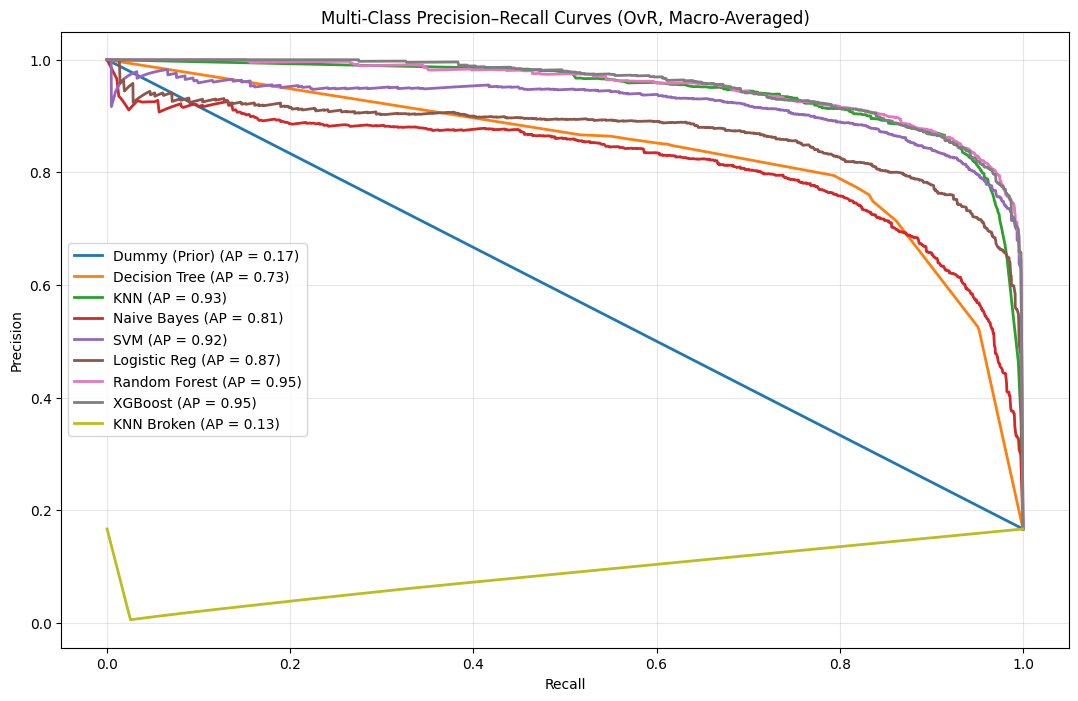

In [49]:
models = {
    "Dummy (Prior)": (y_test, y_pred_proba_dummy),
    "Decision Tree": (y_test, y_pred_proba_dtree),
    "KNN": (y_test, y_pred_proba_knn),
    "Naive Bayes": (y_test, y_pred_proba_nb),
    "SVM": (y_test, y_pred_proba_svm),
    "Logistic Reg": (y_test, y_pred_proba_logistic),
    "Random Forest": (y_test, y_pred_proba_rf),
    "XGBoost": (y_test, y_pred_proba_xgb),
    "KNN Broken": (y_test, y_pred_proba_knn_inverted),
}

# Classes for binarization
classes = np.unique(y_test)
n_classes = len(classes)

plt.figure(figsize=(13, 8))
ap_scores = {}  # To store Average Precision for each model

for name, (y_true, y_proba) in models.items():
    # --- Binarize labels ---
    y_true_bin = label_binarize(y_true, classes=classes)

    precision = dict()
    recall = dict()
    avg_precision = dict()

    # Compute PRC per class 
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_proba[:, i])
        avg_precision[i] = average_precision_score(y_true_bin[:, i], y_proba[:, i])

    # Compute Macro-average Precision-Recall 
    all_recall = np.unique(np.concatenate([recall[i] for i in range(n_classes)]))
    mean_precision = np.zeros_like(all_recall)
    for i in range(n_classes):
        mean_precision += np.interp(all_recall, recall[i][::-1], precision[i][::-1])  # reverse because recall descends
    mean_precision /= n_classes

    ap_macro = np.mean(list(avg_precision.values()))
    ap_scores[name] = ap_macro

    plt.plot(all_recall, mean_precision, lw=2, label=f'{name} (AP = {ap_macro:.2f})')

# --- Plot settings ---
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision–Recall Curves (OvR, Macro-Averaged)')
plt.legend(loc='center left')
plt.grid(alpha=0.3)
plt.show()

In [50]:
# --- Print the Average Precision of every model ---
print("Average Precision Scores:")
for model_name, score in ap_scores.items():
    print(f"- {model_name}: {score:.4f}")

# --- Find and print the best model ---
best_model_name = max(ap_scores, key=ap_scores.get)
best_model_score = ap_scores[best_model_name]
print(f"\nBest Model: {best_model_name} with an Average Precision of {best_model_score:.4f}")

Average Precision Scores:
- Dummy (Prior): 0.1667
- Decision Tree: 0.7305
- KNN: 0.9336
- Naive Bayes: 0.8106
- SVM: 0.9213
- Logistic Reg: 0.8711
- Random Forest: 0.9519
- XGBoost: 0.9542
- KNN Broken: 0.1306

Best Model: XGBoost with an Average Precision of 0.9542


### Analysis of Precision-Recall Curves

#### Best Performing Model

The model with the highest Average Precision (AP) is **XGBoost**, with a macro-averaged AP score of **0.9542**. The Random Forest model is a very close second with an AP of 0.9519. This indicates that both ensemble models are highly effective at this classification task, maintaining high precision across various recall levels.

---

#### Analysis of the Worst-Performing Model

The worst-performing model is **"KNN Broken"**, with an AP of **0.1306**. The "Dummy (Prior)" model, which serves as a no-skill baseline, also performs poorly with an AP of 0.1667.

The Precision-Recall Curve (PRC) for a poor model like "KNN Broken" or "Dummy (Prior)" drops sharply because to increase **Recall**, the model must lower its decision threshold to classify more instances as positive. Here's the breakdown:

* **Precision vs. Recall:** Precision measures the accuracy of positive predictions ($P = \frac{TP}{TP+FP}$), while Recall measures the model's ability to find all actual positive instances ($R = \frac{TP}{TP+FN}$).

* **Behavior of a Poor Model:** A poor or no-skill model is bad at distinguishing between classes. Its confidence scores for true positive instances are often very similar to its scores for true negative instances.

* **The Sharp Drop:** As the model lowers its threshold to capture more true positives (increasing Recall), it simultaneously starts misclassifying a large number of negative instances as positive. This leads to a rapid increase in False Positives ($FP$). Because Precision's denominator ($TP+FP$) grows much faster than its numerator ($TP$), the precision value plummets.

In essence, the sharp drop signifies that the model cannot increase its coverage of the positive class without making a disproportionately large number of mistakes. The **Dummy (Prior)** model's straight line PRC is the theoretical baseline for a no-skill classifier, and the "KNN Broken" model performs even worse than this baseline for most of its recall range.

---

### Model Rankings Comparison

Here is a consolidated table ranking the models from 1 (best) to 9 (worst) based on the three evaluation metrics: Weighted F1-Score, ROC-AUC, and PRC-AP.

| Model | Weighted F1-Score | F1 Rank | ROC-AUC | AUC Rank | PRC-AP | AP Rank |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **Random Forest**| **0.9103** | **1** | **0.9905** | **1** | 0.9519 | 2 |
| **XGBoost** | 0.9092 | 2 | 0.9904 | 2 | **0.9542** | **1** |
| **KNN** | 0.9056 | 3 | 0.9793 | 4 | 0.9336 | 3 |
| **SVM** | 0.8875 | 4 | 0.9857 | 3 | 0.9213 | 4 |
| **Logistic Reg**| 0.8296 | 6 | 0.9755 | 5 | 0.8711 | 5 |
| **Naive Bayes** | 0.8036 | 7 | 0.9551 | 6 | 0.8106 | 6 |
| **Decision Tree**| 0.8428 | 5 | 0.9018 | 7 | 0.7323 | 7 |
| **Dummy (Prior)**| 0.0864 | 8 | 0.5000 | 8 | 0.1667 | 8 |
| **KNN Broken** | 0.0000 | 9 | 0.0208 | 9 | 0.1306 | 9 |

---

### Analysis of Ranking Discrepancies

The model rankings are **mostly aligned but show important differences**, particularly among the top-performing models. While the best models (Random Forest, XGBoost, KNN, SVM) and the worst models (Dummy, KNN Broken) are consistently grouped together, their exact ordering changes depending on the metric used.

The most notable discrepancies are:
1.  **Random Forest vs. XGBoost**: Random Forest is ranked #1 by both F1-Score and ROC-AUC (by a thin margin), but XGBoost takes the top spot for PRC-AP.
2.  **SVM**: SVM ranks higher on ROC-AUC (#3) than it does on either F1-Score (#4) or PRC-AP (#4).

These differences highlight the specific trade-offs each metric evaluates.

#### The Trade-off: ROC-AUC vs. PRC-AP

The core reason for the differing ranks, especially for a model like SVM, lies in how ROC-AUC and PRC-AP handle class imbalance and the impact of False Positives.

* **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**: This metric measures a model's ability to distinguish between classes. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).
    * $TPR = \frac{TP}{TP+FN}$ (Recall)
    * $FPR = \frac{FP}{FP+TN}$
* **PRC-AP (Precision-Recall Curve - Average Precision)**: This metric summarizes the trade-off between the positive predictive value (Precision) and the sensitivity (Recall).
    * $Precision = \frac{TP}{TP+FP}$
    * $Recall = TPR$

**Why can a high ROC-AUC model have a lower PRC-AP?**

The reason is the **False Positive Rate (FPR)**. In datasets with a large number of negative examples (a common scenario), the FPR's denominator ($FP+TN$) is dominated by the huge number of True Negatives ($TN$). A model can therefore generate a significant number of False Positives ($FP$) without a major increase in its FPR. The ROC curve looks great because the model is correctly identifying most of the negatives.

However, the Precision-Recall curve is highly sensitive to those same False Positives. Precision's denominator is $TP+FP$. It doesn't get "credit" for the vast number of true negatives it correctly identified. If achieving higher recall (finding more true positives) comes at the cost of mislabeling many negatives as positives, **precision will plummet**.

**In this specific case**:
* SVM's #3 rank in ROC-AUC suggests it is excellent at separating the positive and negative classes overall.
* Its #4 rank in PRC-AP implies that compared to XGBoost and Random Forest, it is less efficient. To find more of the true positive samples (increase recall), it makes more incorrect positive predictions (more $FP$), which hurts its precision more severely.

---

### Recommendation: Best Model

- Based on the analysis of all metrics and curves, the best model for this classification task is **XGBoost**, with **Random Forest** being an extremely close and equally viable alternative.

- If one model had to be picked it would be XGBoost

---

### Justification 

1.  **Superior Overall Performance:** Both the ROC and Precision-Recall (PRC) curves clearly show that **XGBoost** and **Random Forest** dominate all other models. Their curves are pushed closest to the "ideal" corner in both plots (top-left for ROC, top-right for PRC), indicating the highest performance across all decision thresholds.

2.  **Excellent Precision-Recall Balance:** Both models maintain very high precision (above 0.9) even as recall increases significantly. It can identify a large portion of the true positive cases without making an excessive number of false positive errors.

3.  **The Deciding Factor:** While both models are nearly identical in performance, **XGBoost** holds a marginal edge with the single best **Average Precision score (AP = 0.9542)**. Since the PRC-AP metric is often more informative than ROC-AUC, especially on imbalanced datasets, this slight advantage makes XGBoost the top recommendation.